This document outlines the steps taken to merge livestock data with life expectancy data at the county level, creating a comprehensive dataset that is well-prepared for machine learning (ML) applications. The primary objective of this work is to align the datasets in a structured format, enabling exploratory data analysis and machine learning, with a focus on understanding trends and potential correlations between livestock density and life expectancy at a granular level.

Data Sources:
Life Expectancy Data (2000-2019)

Source: IHME Data - United States Causes of Death and Life Expectancy by County, Race, and Ethnicity
This dataset provides life expectancy data at the county level, broken down by race, ethnicity, and other demographic factors. Data is structured annually from 2000 to 2019 and is identified by unique county FIPS codes.
Livestock Data (2010, 2015, and 2020)

Life Ex data set
https://ghdx.healthdata.org/record/ihme-data/united-states-causes-death-life-expectancy-by-county-race-ethnicity-2000-2019

2010 data source:

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/GIVQ75

2015 data source:

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/LHBICE

2020 data soruce:

https://data.apps.fao.org/catalog//iso/9d1e149b-d63f-4213-978b-317a8eb42d02
The livestock data includes various livestock types (e.g., cattle, chickens, pigs) across multiple years. It is geospatially structured with county-level granularity and includes the Digital Number (DN) for each pixel, representing livestock counts (2010 and 2015) or density (2020). All datasets are provided in the EPSG:4326 coordinate system.
Data Processing and Transformation Steps:
Transformation of Livestock Data:

Data Format Transformation:
The livestock dataset was restructured into a uniform, followable format to facilitate merging with life expectancy data. This included aggregating livestock counts at the county level using the county FIPS code as the unique identifier.
Handling Density Data for 2020:
For 2020, the DN values represent livestock density (number per square kilometer) rather than raw counts. Therefore, each DN value was converted to livestock count by multiplying it by the pixel area in square kilometers.
No-Data Handling:
The livestock datasets contain specific no-data values, which were removed based on metadata information for each year. This ensures that only valid data is included in the merged dataset.
Aggregation and Summing:
For each year, pixel values within each county were summed to derive total livestock counts. This was repeated for each livestock type (e.g., cattle, chickens, pigs) to ensure that data was available in a structured manner for machine learning applications.
Preparation of Life Expectancy Data:

Alignment with County FIPS:
The life expectancy dataset, which spans 2000-2019, uses county FIPS codes for unique identification. This key was aligned with the livestock dataset for accurate merging.
Data Transformation:
Life expectancy data was transformed and aggregated as necessary to match the time intervals of the livestock data. For example, if livestock data was available every five years (2010, 2015, and 2020), the life expectancy data was filtered or interpolated to align with these years.
Yearly Data Verification:
Several checks were performed at each step to verify that the transformations were accurate and that no data was lost during aggregation.
Merging Datasets:

Joining by FIPS Code:
Both datasets were merged based on the unique FIPS code for each county. This allowed for a precise match between life expectancy values and livestock counts in each county.
Yearly Alignment:
The merged dataset was structured to maintain a consistent time-series format, aligning livestock and life expectancy data by year. This alignment ensures that each county has livestock and life expectancy data for each available year, facilitating temporal analysis.
Data Validation:
After merging, multiple validation checks were conducted to ensure that data points were correctly aligned across years and that values were reasonable. This included cross-checking a sample of counties to ensure that livestock totals and life expectancy values were accurately represented.
Preliminary Machine Learning Experiments:

Initial Machine Learning Models:
Some basic machine learning models (e.g., linear regression, decision trees) were applied as exploratory analyses. These initial experiments aimed to test the predictive capability of livestock data for estimating life expectancy trends and to identify potential data transformations needed for more robust modeling.
Focus on Data Preparation:
The primary focus of this stage was on dataset preparation and not on extensive model building. As a result, the models were intended as preliminary checks to validate the dataset’s structure and quality rather than to provide actionable insights. Advanced machine learning work is planned as a subsequent step, now that the dataset is verified.
Final Dataset Structure:

The final merged dataset includes columns for:
County FIPS Code: Unique identifier for each county.
Year: Year of the data point (aligned for livestock and life expectancy).
Life Expectancy Metrics: Life expectancy values, with breakdowns by race and ethnicity where available.
Livestock Counts: Total counts for each livestock type (cattle, chickens, pigs, etc.) for each year.
Additional Coordinates: Latitude and longitude were retained where relevant for geospatial analyses.
This dataset is now structured to facilitate both machine learning applications and detailed exploratory data analysis. It serves as a unified source for studying correlations between livestock density and public health indicators at the county level.
Visual Validation and Scaling:

Scaled Visuals: Visualizations were created using various scaling methods to accurately represent the distribution of livestock and life expectancy data across counties. These visual checks helped verify that data was aligned correctly and that aggregation methods maintained geographic and demographic fidelity.
Map Overlays: Additional maps with state and county boundaries were layered over livestock data to confirm the spatial accuracy of the merged dataset.
Summary
This data preparation and merging process has produced a robust, well-structured dataset that combines livestock counts and life expectancy metrics across U.S. counties from 2010 to 2020. By aligning livestock and life expectancy data with consistent FIPS codes and annual time stamps, this dataset is ready for advanced analysis, including predictive modeling and machine learning. Further machine learning efforts are planned, with the prepared dataset providing a reliable foundation for exploring the relationship between livestock density and life expectancy at a fine spatial and temporal scale.

Import necessary Libarary

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Polygon
import os


Look into one of the csv to investigate contents

In [ ]:
df1=pd.read_csv('/content/IHME_USA_COD_COUNTY_RACE_ETHN_2000_2019_LT_2019_ALL_BOTH_Y2023M06D12.CSV')

## lets extract the life expectency of age group 25 to 29

df2=df1.loc[(df1['race_name'] == 'Total') & (df1['age_name'] == '<1 year')]

df3=df2.loc[(df2['fips'] < 60)]


col_names=list(df3.columns)

df4 = df3.drop(['measure_id',
 'location_id',
  'fips',
 'measure_name',
 'race_id',
 'race_name',
 'sex_id',
 'sex_name',
 'age_group_id',
 'age_name',
 'year',
 'metric_id',
 'metric_name',
 'upper',
 'lower'], axis=1)

substring = 'Alaska'
filter = df4['location_name'].str.contains(substring)
filtered_df = df4[~filter]

substring = 'Hawaii'
filter = filtered_df['location_name'].str.contains(substring)
df = filtered_df[~filter]

df

,location_name,val
114,Alabama,75.635095
12312,Arizona,79.274249
14136,Arkansas,75.958405
22800,California,81.399340
29526,Colorado,80.552398
36936,Connecticut,81.017511
37962,Delaware,78.389645
38418,District of Columbia,78.563579
38646,Florida,79.379708
46512,Georgia,77.894794


In [ ]:
df1.head()

,measure_id,measure_name,location_id,location_name,fips,race_id,race_name,sex_id,sex_name,age_group_id,age_name,year,metric_id,metric_name,val,upper,lower
0,26,Life expectancy,102,United States of America,NaN,1,Total,3,Both,28,<1 year,2019,1,Number,79.086177,79.107980,79.065224
1,26,Life expectancy,102,United States of America,NaN,2,Latino,3,Both,28,<1 year,2019,1,Number,82.215224,82.463825,81.972812
2,26,Life expectancy,102,United States of America,NaN,4,Black,3,Both,28,<1 year,2019,1,Number,75.318565,75.419046,75.222292
3,26,Life expectancy,102,United States of America,NaN,5,White,3,Both,28,<1 year,2019,1,Number,78.977396,79.020753,78.934126
4,26,Life expectancy,102,United States of America,NaN,6,AIAN,3,Both,28,<1 year,2019,1,Number,73.301859,74.996554,71.672010


In [ ]:
df.describe()

,val
count,49.000000
mean,78.661250
std,1.737948
min,74.694268
25%,77.894794
50%,79.096697
75%,79.962886
max,81.628256


Import shp file of the US state and investigate the content

In [ ]:
gdf = gpd.read_file('cb_2018_us_state_500k.shp')
gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."


In [ ]:
gdf = gdf.merge(df,left_on='NAME',right_on='location_name')


Plotting Age Group < 1 Y on using state shp

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: title={'center': ' Total Life Expectency of Age Group < 1 year old (Year 2019) '}>

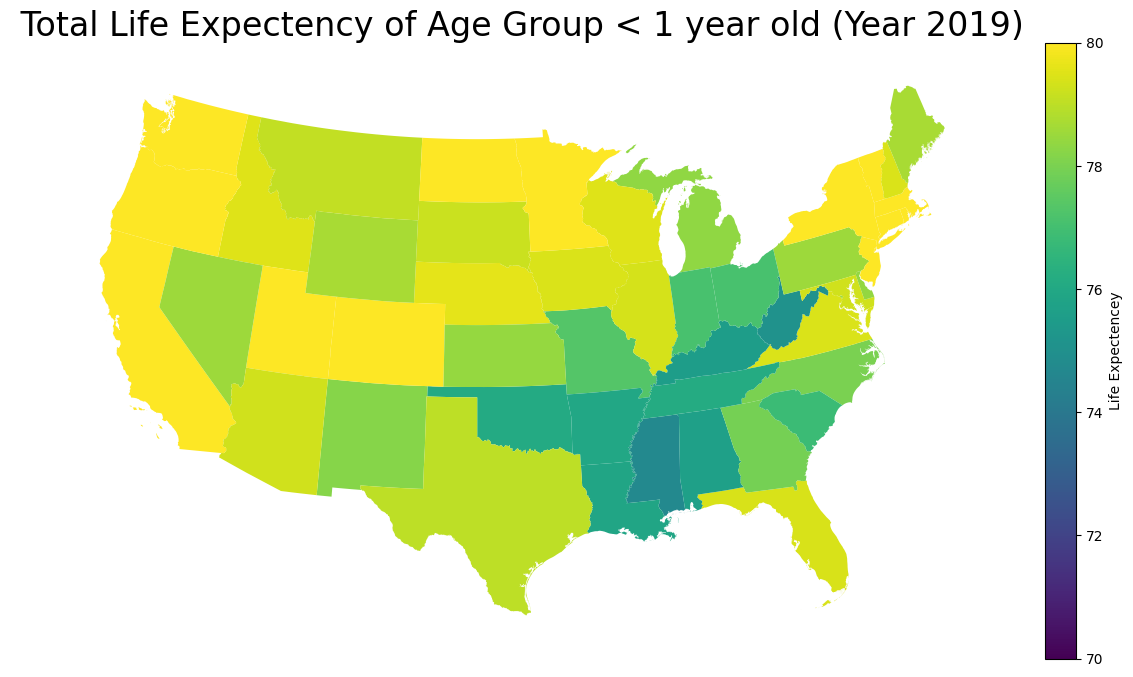

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 8))

visframe = gdf.to_crs({'init':'epsg:2163'})
ax.axis('off')

ax.set_title(' Total Life Expectency of Age Group < 1 year old (Year 2019) ', fontdict={'fontsize': '24', 'fontweight' : '1'})


visframe.plot("val", linewidth=0.8,ax=ax, legend=True,vmin=70, vmax=80,legend_kwds={"label": "Life Expectencey"})

Preparing data for ML: Merging all raw csv to get a combined csv life < 1 Y

In [ ]:
import pandas as pd

# List of file paths for all years from 2000 to 2019
csv_files = [
    'IHME_USA_COD_COUNTY_RACE_ETHN_2000_2019_LT_2000_ALL_BOTH_Y2023M06D12.CSV',
    'IHME_USA_COD_COUNTY_RACE_ETHN_2000_2019_LT_2001_ALL_BOTH_Y2023M06D12.CSV',
    'IHME_USA_COD_COUNTY_RACE_ETHN_2000_2019_LT_2002_ALL_BOTH_Y2023M06D12.CSV',
    'IHME_USA_COD_COUNTY_RACE_ETHN_2000_2019_LT_2003_ALL_BOTH_Y2023M06D12.CSV',
    'IHME_USA_COD_COUNTY_RACE_ETHN_2000_2019_LT_2004_ALL_BOTH_Y2023M06D12.CSV',
    'IHME_USA_COD_COUNTY_RACE_ETHN_2000_2019_LT_2005_ALL_BOTH_Y2023M06D12.CSV',
    'IHME_USA_COD_COUNTY_RACE_ETHN_2000_2019_LT_2006_ALL_BOTH_Y2023M06D12.CSV',
    'IHME_USA_COD_COUNTY_RACE_ETHN_2000_2019_LT_2007_ALL_BOTH_Y2023M06D12.CSV',
    'IHME_USA_COD_COUNTY_RACE_ETHN_2000_2019_LT_2008_ALL_BOTH_Y2023M06D12.CSV',
    'IHME_USA_COD_COUNTY_RACE_ETHN_2000_2019_LT_2009_ALL_BOTH_Y2023M06D12.CSV',
    'IHME_USA_COD_COUNTY_RACE_ETHN_2000_2019_LT_2010_ALL_BOTH_Y2023M06D12.CSV',
    'IHME_USA_COD_COUNTY_RACE_ETHN_2000_2019_LT_2011_ALL_BOTH_Y2023M06D12.CSV',
    'IHME_USA_COD_COUNTY_RACE_ETHN_2000_2019_LT_2012_ALL_BOTH_Y2023M06D12.CSV',
    'IHME_USA_COD_COUNTY_RACE_ETHN_2000_2019_LT_2013_ALL_BOTH_Y2023M06D12.CSV',
    'IHME_USA_COD_COUNTY_RACE_ETHN_2000_2019_LT_2014_ALL_BOTH_Y2023M06D12.CSV',
    'IHME_USA_COD_COUNTY_RACE_ETHN_2000_2019_LT_2015_ALL_BOTH_Y2023M06D12.CSV',
    'IHME_USA_COD_COUNTY_RACE_ETHN_2000_2019_LT_2016_ALL_BOTH_Y2023M06D12.CSV',
    'IHME_USA_COD_COUNTY_RACE_ETHN_2000_2019_LT_2017_ALL_BOTH_Y2023M06D12.CSV',
    'IHME_USA_COD_COUNTY_RACE_ETHN_2000_2019_LT_2018_ALL_BOTH_Y2023M06D12.CSV',
    'IHME_USA_COD_COUNTY_RACE_ETHN_2000_2019_LT_2019_ALL_BOTH_Y2023M06D12.CSV'
]

# Function to filter and process the dataframe for each year
def filter_life_expectancy_data(file_path, year):
    df = pd.read_csv(file_path)
    # Filter for age group <1 year and race 'Total'
    df_filtered = df[(df['age_name'] == '<1 year') & (df['race_name'] == 'Total')]
    # Keep only relevant columns and rename 'val' to include the year
    df_filtered = df_filtered[['location_name', 'fips', 'val']].rename(columns={'val': f'val_{year}'})
    return df_filtered

# Initialize the final combined dataframe with the first file (for 2000)
df_combined = filter_life_expectancy_data(csv_files[0], 2000)

# Loop through the remaining files for 2001 to 2019 and merge each one
for i, file_path in enumerate(csv_files[1:], start=2001):
    df_year = filter_life_expectancy_data(file_path, i)
    # Merge the dataframes on 'location_name' and 'fips'
    df_combined = pd.merge(df_combined, df_year, on=['location_name', 'fips'], how='outer')

# Save the final combined dataframe to a CSV file
output_file = 'life_expectancy_at_birth_2000_2019.csv'
df_combined.to_csv(output_file, index=False)

print(f"Combined CSV saved to {output_file}")


Combined CSV saved to life_expectancy_at_birth_2000_2019.csv


In [ ]:
df_combined

,location_name,fips,val_2000,val_2001,val_2002,val_2003,val_2004,val_2005,val_2006,val_2007,...,val_2010,val_2011,val_2012,val_2013,val_2014,val_2015,val_2016,val_2017,val_2018,val_2019
0,Abbeville County (South Carolina),45001.0,75.980420,75.981161,75.916165,75.966204,76.319416,76.207319,76.453280,76.653764,...,76.650861,76.593157,76.554614,76.391040,76.360928,76.112399,76.136703,75.939306,76.071454,76.248049
1,Acadia Parish (Louisiana),22001.0,72.816952,72.848029,72.749500,72.816691,73.102027,72.850675,73.024997,73.287585,...,74.088284,74.021136,74.133702,74.223522,74.274869,74.152730,74.052250,73.999975,74.237469,74.567141
2,Accomack County (Virginia),51001.0,74.101498,74.166722,74.075496,74.194850,74.573077,74.493398,74.819760,75.007307,...,75.679679,75.651133,75.798941,75.844348,75.780658,75.653130,75.376467,75.462566,75.590747,75.809517
3,Ada County (Idaho),16001.0,78.952843,79.058573,79.035181,79.161321,79.530294,79.463248,79.720674,79.939107,...,80.465999,80.527821,80.699209,80.688150,80.786121,80.625548,80.649212,80.562384,80.769477,80.936015
4,Adair County (Iowa),19001.0,78.048044,78.119828,78.085009,78.197329,78.549263,78.379155,78.523619,78.717855,...,79.071983,78.928587,78.760544,78.676920,78.751181,78.416808,78.272222,78.081140,78.191306,78.255112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,Yuma County (Arizona),4027.0,80.032310,79.955187,79.810591,79.821061,80.104311,79.883504,79.979016,80.214956,...,81.237942,81.148145,81.352168,81.390182,81.338772,81.109722,81.132358,81.124426,81.237900,81.435390
3206,Yuma County (Colorado),8125.0,77.505282,77.625431,77.547376,77.694853,78.091919,78.040823,78.280252,78.554201,...,78.893801,78.897014,78.964163,79.155932,79.185588,78.890093,78.869950,78.800370,79.081516,79.181991
3207,Zapata County (Texas),48505.0,78.407715,78.474031,78.421428,78.562235,78.920438,78.573272,78.857410,78.970845,...,78.954209,78.698112,78.814817,78.540541,78.411706,78.550983,78.270403,78.118625,78.279743,78.485587
3208,Zavala County (Texas),48507.0,75.847629,75.935260,75.990408,76.247685,76.643420,76.583270,76.695419,76.971334,...,77.502922,77.307836,77.234665,77.121040,77.084995,76.613155,76.340497,76.304361,76.363936,76.419034


In [ ]:
df_combined.describe()

,location_id,val_2000,val_2001,val_2002,val_2003,val_2004,val_2005,val_2006,val_2007,val_2008,...,val_2010,val_2011,val_2012,val_2013,val_2014,val_2015,val_2016,val_2017,val_2018,val_2019
count,3210.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,...,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000
mean,4407.795327,76.169266,76.244483,76.214403,76.345829,76.725170,76.644558,76.866370,77.071326,77.089780,...,77.570069,77.522347,77.562454,77.509826,77.535704,77.322395,77.213985,77.143377,77.310257,77.448241
std,14366.538690,2.127178,2.159532,2.193719,2.216340,2.250683,2.297868,2.338890,2.354473,2.365521,...,2.372299,2.409255,2.439921,2.468825,2.506903,2.539174,2.621468,2.644556,2.660057,2.690035
min,102.000000,65.326742,65.326961,65.265661,65.461621,65.799950,65.852274,65.859125,66.077381,66.429075,...,66.689077,66.550314,66.686695,66.297773,66.047153,65.981286,65.358475,65.340021,65.176273,65.423111
25%,1350.250000,74.717058,74.779447,74.727057,74.834085,75.185730,75.111994,75.285817,75.478023,75.473386,...,75.943929,75.891749,75.892265,75.841829,75.838293,75.615742,75.452394,75.360680,75.482073,75.617675
50%,2154.500000,76.300441,76.384167,76.358849,76.496074,76.863741,76.784214,77.018152,77.222784,77.240092,...,77.724078,77.670535,77.704187,77.657303,77.681565,77.474529,77.350874,77.280762,77.411802,77.571214
75%,2959.750000,77.694720,77.789127,77.802867,77.955559,78.369146,78.323709,78.548998,78.764166,78.761602,...,79.185829,79.171340,79.215096,79.190310,79.216612,79.011691,78.959386,78.901690,79.074395,79.217575
max,94092.000000,86.566399,86.829572,86.805086,87.032539,87.664395,87.642943,88.214175,88.737795,88.856631,...,89.633202,89.495691,89.752230,89.963189,90.482271,90.089106,90.759934,91.044580,91.620365,92.253858



Preparing Livestock csv


Loading livestock csv and investigate the contents


In [ ]:
df_live=pd.read_csv("/content/livestock_counts_by_county.csv")

In [ ]:
 df_live

,NAME,GEOID,Livestock_Type,Year,Livestock_Count
0,Baldwin,1003,Buffalo,2010,0.000000
1,Houston,1069,Buffalo,2010,0.000000
2,Barbour,1005,Buffalo,2010,2467.643037
3,Sumter,1119,Buffalo,2010,0.000000
4,Miller,5091,Buffalo,2010,842.719464
...,...,...,...,...,...
71165,Cooke,48097,Sheep,2020,3241.842285
71166,Wayne,17191,Sheep,2020,1136.828369
71167,Aguadilla,72005,Sheep,2020,29.364876
71168,Toa Baja,72137,Sheep,2020,2.310058


We are doing still working Livestock data to make it aligned with LifeEx data.

The livestock data consists of the following columns:

NAME: The name of the location (e.g., counties).
GEOID: A unique identifier for each location.
Livestock_Type: The type of livestock (e.g., Buffalo, etc.).
Year: The year in which the livestock count was recorded (e.g., 2010, 2015, 2020).
Livestock_Count: The count of livestock for that specific type, year, and location.
Objective:
You want the data to be transformed in such a way that for each location (identified by NAME and GEOID), the livestock counts for different types and years are aligned in columns. This will make it easier to merge with the life expectancy data later.

Approach:
Pivot the table: We will pivot the Livestock_Type, Year, and Livestock_Count columns, so that each livestock type and year becomes a separate column (e.g., Buffalo_2010, Buffalo_2015, etc.).
Combine the columns with NAME and GEOID: The transformed table will have the NAME, GEOID, and then columns for each combination of Livestock_Type and Year.

In [ ]:
livestock_file_path = 'livestock_counts_by_county.csv'  # Change this if the file name differs
df_livestock = pd.read_csv(livestock_file_path)

# Step 4: Transform the data by pivoting it to the desired structure
# Pivot the data to have livestock types and years as columns
df_pivoted = df_livestock.pivot_table(
    index=['NAME', 'GEOID'],
    columns=['Livestock_Type', 'Year'],
    values='Livestock_Count',
    aggfunc='sum'
)

# Flatten the multi-level columns
df_pivoted.columns = [f'{livestock_type}_{year}' for livestock_type, year in df_pivoted.columns]

# Reset the index to make NAME and GEOID regular columns again
df_pivoted = df_pivoted.reset_index()

# Step 5: Display the transformed dataframe
df_pivoted.head()

# Step 6: (Optional) Save the transformed dataframe to a new CSV file
output_file = 'transformed_livestock_data.csv'
df_pivoted.to_csv(output_file, index=False)

# # Step 7: (Optional) Download the CSV file to your local machine
# files.download(output_file)


In [ ]:
df_pivoted.head()

,NAME,GEOID,Buffalo_2010,Buffalo_2015,Buffalo_2020,Cattle_2010,Cattle_2015,Cattle_2020,Chicken_2010,Chicken_2015,...,Goat_2015,Goat_2020,Horse_2010,Horse_2015,Pig_2010,Pig_2015,Pig_2020,Sheep_2010,Sheep_2015,Sheep_2020
0,Abbeville,45001,0.0,0.0,0.0,12905.547418,11575.254883,14687.365234,2.859284e+03,6.167250e+04,...,1623.930908,1971.119629,1996.050329,2580.981934,128.762687,223.071686,303.081360,345.978438,449.924896,530.306030
1,Acadia,22001,0.0,0.0,0.0,11028.392878,11039.015625,13402.103516,3.027555e+03,2.442251e+03,...,160.031830,187.384277,2953.431372,3615.111084,173.181818,72.091057,95.698715,733.130022,808.489807,912.618591
2,Accomack,51001,0.0,0.0,0.0,344.739377,700.857422,924.190979,7.681915e+06,5.793915e+06,...,61.360764,77.289101,525.476333,626.837769,4005.954873,35.962166,51.299488,145.806335,498.741852,605.769348
3,Ada,16001,0.0,0.0,0.0,129584.015913,51912.558594,76015.804688,8.583566e+03,6.877029e+03,...,889.923950,1228.037231,10943.617254,10134.980469,3291.702496,2069.734375,3190.632324,1170.088434,1760.510864,2374.722656
4,Adair,19001,0.0,0.0,0.0,42993.803050,39342.273438,54965.773438,5.999696e+02,3.599840e+02,...,502.234344,657.079712,1027.618736,1277.458984,40050.700029,48210.406250,71791.203125,994.880208,1061.166016,1381.834229


Transforming for 2000 to 2019


 We used livestock value from 2010,2015 and 2020. before 2010 all values are same as 2010. In between 2010 and 215 linear interpolation used using data from 2010 and 2015. Similarly, in between 2015 and 2000 linear interpolation is used.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the transformed livestock data
livestock_file_path = '/content/transformed_livestock_data.csv'
df_livestock = pd.read_csv(livestock_file_path)

# List of years we want to fill in the data for (2000 to 2020)
years = list(range(2000, 2021))

# Function to perform linear interpolation and extrapolation for the years 2000 to 2020
def interpolate_livestock_data(row, livestock_type):
    # Check if the columns for 2010, 2015, and 2020 exist
    values_2010 = row.get(f'{livestock_type}_2010', np.nan)
    values_2015 = row.get(f'{livestock_type}_2015', np.nan)
    values_2020 = row.get(f'{livestock_type}_2020', np.nan)

    # Filter out missing values (NaN) and corresponding years
    known_years = np.array([2010, 2015, 2020]).reshape(-1, 1)
    known_values = np.array([values_2010, values_2015, values_2020]).reshape(-1, 1)

    # Remove any rows with NaN in the known values
    valid_mask = ~np.isnan(known_values).ravel()
    known_years = known_years[valid_mask]
    known_values = known_values[valid_mask]

    # If no valid data is available, return NaN for all years
    if len(known_years) == 0:
        return [np.nan] * len(years)

    # If only one known value, replicate it for all years
    if len(known_years) == 1:
        return [known_values[0][0]] * len(years)

    # Create a Linear Regression model to interpolate
    model = LinearRegression()
    model.fit(known_years, known_values)

    # For each year in the range 2000 to 2020, predict the values
    interpolated_values = []
    for year in years:
        if year < 2010:
            interpolated_values.append(values_2010)  # Use 2010 value for years before 2010
        elif year > 2020:
            interpolated_values.append(values_2020)  # Use 2020 value for years after 2020
        else:
            interpolated_values.append(model.predict([[year]])[0][0])  # Interpolate for years between 2010 and 2020

    return interpolated_values

# Get the list of livestock types from the column names
livestock_types = [col.split('_')[0] for col in df_livestock.columns if '_2010' in col]

# Create a new dataframe to hold the interpolated data for all years (2000-2020)
df_interpolated = pd.DataFrame()

# Retain the NAME and GEOID columns
df_interpolated['NAME'] = df_livestock['NAME']
df_interpolated['GEOID'] = df_livestock['GEOID']

# Loop over each livestock type and interpolate the data
for livestock_type in livestock_types:
    interpolated_data = df_livestock.apply(lambda row: interpolate_livestock_data(row, livestock_type), axis=1)

    # Create columns for each year (2000-2020) for this livestock type
    for i, year in enumerate(years):
        df_interpolated[f'{livestock_type}_{year}'] = interpolated_data.apply(lambda x: x[i])

# Save the interpolated dataframe to a CSV file
output_file = 'interpolated_livestock_data_2000_2020.csv'
df_interpolated.to_csv(output_file, index=False)

print(f"Interpolated CSV saved to {output_file}")


<ipython-input-29-09f295561110>:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_interpolated[f'{livestock_type}_{year}'] = interpolated_data.apply(lambda x: x[i])
<ipython-input-29-09f295561110>:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_interpolated[f'{livestock_type}_{year}'] = interpolated_data.apply(lambda x: x[i])
<ipython-input-29-09f295561110>:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

Interpolated CSV saved to interpolated_livestock_data_2000_2020.csv


In [ ]:
df_interpolated

,NAME,GEOID,Buffalo_2000,Buffalo_2001,Buffalo_2002,Buffalo_2003,Buffalo_2004,Buffalo_2005,Buffalo_2006,Buffalo_2007,...,Sheep_2011,Sheep_2012,Sheep_2013,Sheep_2014,Sheep_2015,Sheep_2016,Sheep_2017,Sheep_2018,Sheep_2019,Sheep_2020
0,Abbeville,45001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,368.338751,386.771510,405.204270,423.637029,442.069788,460.502547,478.935307,497.368066,515.800825,534.233584
1,Acadia,22001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,746.284046,764.232903,782.181760,800.130616,818.079473,836.028330,853.977187,871.926044,889.874901,907.823758
2,Accomack,51001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,232.787306,278.783607,324.779909,370.776210,416.772512,462.768813,508.765114,554.761416,600.757717,646.754018
3,Ada,16001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1286.586963,1407.050385,1527.513807,1647.977229,1768.440651,1888.904074,2009.367496,2129.830918,2250.294340,2370.757763
4,Adair,19001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,991.178542,1029.873944,1068.569346,1107.264748,1145.960151,1184.655553,1223.350955,1262.046357,1300.741759,1339.437161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,Yuma,4027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8830.499744,9066.076617,9301.653490,9537.230362,9772.807235,10008.384107,10243.960980,10479.537852,10715.114725,10950.691597
3231,Yuma,8125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,138.616488,144.908630,151.200772,157.492913,163.785055,170.077197,176.369338,182.661480,188.953621,195.245763
3232,Zapata,48505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,418.417936,519.336386,620.254836,721.173287,822.091737,923.010188,1023.928638,1124.847089,1225.765539,1326.683990
3233,Zavala,48507,1322.307932,1322.307932,1322.307932,1322.307932,1322.307932,1322.307932,1322.307932,1322.307932,...,139.209609,139.704288,140.198968,140.693648,141.188328,141.683007,142.177687,142.672367,143.167046,143.661726


In [ ]:
df_interpolated.describe()

,GEOID,Buffalo_2000,Buffalo_2001,Buffalo_2002,Buffalo_2003,Buffalo_2004,Buffalo_2005,Buffalo_2006,Buffalo_2007,Buffalo_2008,...,Sheep_2011,Sheep_2012,Sheep_2013,Sheep_2014,Sheep_2015,Sheep_2016,Sheep_2017,Sheep_2018,Sheep_2019,Sheep_2020
count,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,...,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000
mean,31522.781453,375.374453,375.374453,375.374453,375.374453,375.374453,375.374453,375.374453,375.374453,375.374453,...,1676.836115,1717.853665,1758.871214,1799.888764,1840.906314,1881.923863,1922.941413,1963.958962,2004.976512,2045.994061
std,16431.824116,1526.894402,1526.894402,1526.894402,1526.894402,1526.894402,1526.894402,1526.894402,1526.894402,1526.894402,...,6453.282187,6449.181100,6457.845889,6479.225339,6513.194244,6559.557022,6618.053202,6688.364438,6770.122622,6862.918663
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-564.303062,-1960.813411
25%,19036.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,187.078765,198.378209,206.770424,211.156522,213.879373,216.184226,218.747808,220.693014,221.047730,223.498470
50%,30035.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,433.064180,463.674482,496.251198,512.072150,531.743422,548.600391,563.676875,577.518898,588.037642,604.802682
75%,46126.000000,248.369151,248.369151,248.369151,248.369151,248.369151,248.369151,248.369151,248.369151,248.369151,...,1074.706751,1144.031540,1197.752060,1236.942654,1285.366913,1361.710760,1400.402685,1462.789617,1507.070771,1552.197477
max,78030.000000,35811.270593,35811.270593,35811.270593,35811.270593,35811.270593,35811.270593,35811.270593,35811.270593,35811.270593,...,185106.676623,186997.680947,188888.685271,190779.689595,192670.693920,194561.698244,196452.702568,198343.706892,200234.711216,202125.715540


Investigate both files (we want to merge them now)

In [ ]:
import pandas as pd

# Step 1: Load both datasets
life_expectancy_file = '/content/life_expectancy_at_birth_2000_2019.csv'  # Path to your life expectancy file
livestock_file = '/content/interpolated_livestock_data_2000_2020.csv'  # Path to your livestock file

df_life_expectancy = pd.read_csv(life_expectancy_file)
df_livestock = pd.read_csv(livestock_file)

# Step 2: Check for missing values in the 'fips' column of life expectancy dataset
nan_fips_count = df_life_expectancy['fips'].isna().sum()

# Step 3: Display first few rows of both datasets
print("Life Expectancy Dataset Head:")
print(df_life_expectancy.head())

print("\nLivestock Dataset Head:")
print(df_livestock.head())

# Step 4: Display some information about the 'fips' column in the life expectancy dataset
print(f"\nTotal missing (NaN) values in 'fips' column: {nan_fips_count}")

# Step 5: Find out if there are any non-integer or invalid FIPS codes
# This will list any rows with invalid 'fips' values
invalid_fips_rows = df_life_expectancy[df_life_expectancy['fips'].isna()]

print("\nRows with invalid 'fips' values (NaNs):")
print(invalid_fips_rows)

# Step 6: Output the column names to understand the structure of the datasets
print("\nColumns in Life Expectancy dataset:", df_life_expectancy.columns)
print("Columns in Livestock dataset:", df_livestock.columns)


Life Expectancy Dataset Head:
                       location_name     fips   val_2000   val_2001  \
0  Abbeville County (South Carolina)  45001.0  75.980420  75.981161   
1          Acadia Parish (Louisiana)  22001.0  72.816952  72.848029   
2         Accomack County (Virginia)  51001.0  74.101498  74.166722   
3                 Ada County (Idaho)  16001.0  78.952843  79.058573   
4                Adair County (Iowa)  19001.0  78.048044  78.119828   

    val_2002   val_2003   val_2004   val_2005   val_2006   val_2007  ...  \
0  75.916165  75.966204  76.319416  76.207319  76.453280  76.653764  ...   
1  72.749500  72.816691  73.102027  72.850675  73.024997  73.287585  ...   
2  74.075496  74.194850  74.573077  74.493398  74.819760  75.007307  ...   
3  79.035181  79.161321  79.530294  79.463248  79.720674  79.939107  ...   
4  78.085009  78.197329  78.549263  78.379155  78.523619  78.717855  ...   

    val_2010   val_2011   val_2012   val_2013   val_2014   val_2015  \
0  76.650861  7

In [ ]:
import pandas as pd

# Step 1: Load both datasets
life_expectancy_file = '/content/life_expectancy_at_birth_2000_2019.csv'  # Path to your life expectancy file
livestock_file = '/content/interpolated_livestock_data_2000_2020.csv'  # Path to your livestock file

df_life_expectancy = pd.read_csv(life_expectancy_file)
df_livestock = pd.read_csv(livestock_file)

# Step 1: Drop the row with missing fips in life expectancy dataset
df_life_expectancy = df_life_expectancy.dropna(subset=['fips'])

# Step 2: Convert 'fips' to integer (as it's a float due to NaN, needs to be converted after removing NaN)
df_life_expectancy['fips'] = df_life_expectancy['fips'].astype(int)

# Step 3: Merge the datasets on fips (life expectancy) and GEOID (livestock)
merged_df = pd.merge(df_life_expectancy, df_livestock, left_on='fips', right_on='GEOID', how='inner')

# Step 4: Reorder columns: start with location_name, fips, followed by year-wise livestock and life expectancy values
ordered_columns = ['location_name', 'fips']  # Base columns

# Now, create a list of columns year by year for both livestock and life expectancy
for year in range(2000, 2020):
    # Livestock columns for the year
    livestock_cols = [f'Buffalo_{year}', f'Cattle_{year}', f'Chicken_{year}', f'Duck_{year}',
                      f'Goat_{year}', f'Horse_{year}', f'Pig_{year}', f'Sheep_{year}']

    # Life expectancy column for the year
    life_expectancy_col = f'val_{year}'

    # Add both livestock and life expectancy columns to the ordered list
    ordered_columns.extend(livestock_cols)
    ordered_columns.append(life_expectancy_col)

# Select and reorder the columns in the merged DataFrame
merged_df = merged_df[ordered_columns]

# Step 5: Save the merged and reordered DataFrame to a CSV
output_file = 'merged_livestock_life_expectancy_2000_2019.csv'
merged_df.to_csv(output_file, index=False)

print(f"Merged and ordered dataset saved to {output_file}")


<ipython-input-7-648553cc5276>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_life_expectancy['fips'] = df_life_expectancy['fips'].astype(int)


Merged and ordered dataset saved to merged_livestock_life_expectancy_2000_2019.csv


This is the final df that we are using for the ML

In [ ]:
merged_df


,location_name,fips,Buffalo_2000,Cattle_2000,Chicken_2000,Duck_2000,Goat_2000,Horse_2000,Pig_2000,Sheep_2000,...,val_2018,Buffalo_2019,Cattle_2019,Chicken_2019,Duck_2019,Goat_2019,Horse_2019,Pig_2019,Sheep_2019,val_2019
0,Abbeville County (South Carolina),45001,0.000000,12905.547418,2.859284e+03,77.308459,1755.172449,1996.050329,128.762687,345.978438,...,76.071454,0.000000,13768.782972,6.015288e+04,208.503147,1869.786534,3048.927217,288.032713,515.800825,76.248049
1,Acadia Parish (Louisiana),22001,0.000000,11028.392878,3.027555e+03,286.646139,264.710133,2953.431372,173.181818,733.130022,...,74.237469,0.000000,12772.654928,2.202189e+03,340.183906,173.111738,4144.454853,82.663956,889.874901,74.567141
2,Accomack County (Virginia),51001,0.000000,344.739377,7.681915e+06,45.443392,206.225467,525.476333,4005.954873,145.806335,...,75.590747,0.000000,888.376567,5.574086e+06,696.517692,63.383897,707.926917,-217.456645,600.757717,75.809517
3,Ada County (Idaho),16001,0.000000,129584.015913,8.583566e+03,525.949073,1007.697231,10943.617254,3291.702496,1170.088434,...,80.769477,0.000000,64410.175241,6.972753e+03,3021.686249,1130.022138,9488.071040,2810.261663,2250.294340,80.936015
4,Adair County (Iowa),19001,0.000000,42993.803050,5.999696e+02,283.467256,580.526235,1027.618736,40050.700029,994.880208,...,78.191306,0.000000,50556.071463,3.509338e+02,499.131566,610.568155,1477.331183,66046.971040,1300.741759,78.255112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,Yuma County (Arizona),4027,0.000000,52002.099837,1.354217e+03,42.981329,778.994410,2779.684696,44.021432,8633.547681,...,81.237900,0.000000,37854.955323,2.179711e+04,694.603017,288.239130,2520.641794,568.805173,10715.114725,81.435390
3131,Yuma County (Colorado),8125,0.000000,273649.197370,1.465069e+03,29.160047,770.099085,1753.927277,348.551263,137.380769,...,79.081516,0.000000,294841.626425,1.234801e+03,128.126337,1095.136335,3286.654028,7002.113933,188.953621,79.181991
3132,Zapata County (Texas),48505,0.000000,24158.306393,8.753842e+02,2268.438175,869.573978,1527.602146,147.751131,182.815862,...,78.279743,0.000000,20083.780355,4.428307e+02,-1766.433225,1518.424788,577.076072,20.195462,1225.765539,78.485587
3133,Zavala County (Texas),48507,1322.307932,40097.996908,3.771238e+02,980.294346,1904.873226,979.569803,48.423574,143.032756,...,76.363936,-88.153862,50175.217133,3.951739e+02,-718.808501,812.494165,2289.822624,-3.228238,143.167046,76.419034


In [ ]:
merged_df.describe()

,fips,Buffalo_2000,Cattle_2000,Chicken_2000,Duck_2000,Goat_2000,Horse_2000,Pig_2000,Sheep_2000,val_2000,...,val_2018,Buffalo_2019,Cattle_2019,Chicken_2019,Duck_2019,Goat_2019,Horse_2019,Pig_2019,Sheep_2019,val_2019
count,3135.000000,3135.000000,3.135000e+03,3.135000e+03,3.135000e+03,3135.000000,3135.000000,3.135000e+03,3135.000000,3104.000000,...,3104.000000,3135.000000,3.135000e+03,3.135000e+03,3.135000e+03,3135.000000,3135.000000,3.135000e+03,3135.000000,3104.000000
mean,30429.100478,386.881088,2.992767e+04,6.238780e+05,2.199807e+03,967.351177,3173.163073,2.070518e+04,1790.638471,76.160999,...,77.281893,-25.792073,3.580009e+04,6.112428e+05,2.581182e+03,1009.726331,3333.718775,2.995901e+04,2063.556101,77.419174
std,15149.461250,1549.609276,4.865526e+04,2.367332e+06,4.687725e+04,2697.955048,5474.749019,9.209442e+04,7330.404214,2.122588,...,2.647943,103.307285,5.601265e+04,2.277261e+06,4.670388e+04,2707.260723,5204.290610,1.237977e+05,6868.742497,2.678358
min,1001.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,65.326742,...,65.176273,-2387.418040,-1.530327e+02,-4.203060e+05,-2.595600e+05,-690.833399,-7648.204663,-1.660188e+04,-564.303062,65.423111
25%,19004.000000,0.000000,5.829506e+03,6.599666e+02,5.735709e+01,199.040304,848.445691,1.012493e+02,180.352627,74.701098,...,75.452848,-17.752927,6.772790e+03,8.831169e+02,5.053722e+00,228.491890,1039.259336,1.616931e+02,242.275344,75.592402
50%,29183.000000,0.000000,1.611844e+04,2.029612e+03,1.484810e+02,428.442865,1845.672400,3.266691e+02,427.014627,76.273919,...,77.381641,0.000000,1.921693e+04,3.692339e+03,2.701597e+02,498.919426,2151.184527,6.311996e+02,614.737980,77.527989
75%,45084.000000,266.293898,3.743062e+04,7.664755e+03,3.047213e+02,845.358217,3698.822525,2.467164e+03,1064.762019,77.681034,...,79.025274,0.000000,4.496225e+04,4.252685e+04,7.064328e+02,968.905281,4089.482453,5.897097e+03,1542.088008,79.182730
max,56045.000000,35811.270593,1.135775e+06,4.056678e+07,2.339334e+06,63925.327410,169143.625373,2.045677e+06,195805.941134,86.566399,...,91.620365,0.000000,1.093469e+06,4.734732e+07,1.478036e+06,65560.422360,169832.665386,2.453964e+06,200234.711216,92.253858


Now we are preparing for ML


ML starts here

Plan
Data Preparation:

For each year, we'll use livestock features (e.g., Buffalo_2000, Cattle_2000, etc.) as input (features) to predict life expectancy (val_2000).
We'll split the data into training and test sets to evaluate the model’s performance.
Standardize the features (if necessary) to ensure uniform scaling, which can help improve model performance.
Modeling:

We can start with simple linear regression, which is interpretable and useful for seeing relationships between livestock and life expectancy.
Then, we can move on to more complex models (like Random Forest or Gradient Boosting) to check if they improve performance.
Performance Metrics:

We'll use metrics like Root Mean Squared Error (RMSE) and R² to evaluate the model.
We’ll use cross-validation to ensure robust performance evaluation and avoid overfitting.
Independent Validation:

We'll split the dataset into training (80%) and testing (20%), and validate on the testing set to ensure the model generalizes well.
Visualization:

We'll visualize the predicted vs. actual life expectancy to assess how well the model performs.

In [ ]:
# Modified function to handle missing values
def prepare_data_for_year(year, df):
    livestock_cols = [f'Buffalo_{year}', f'Cattle_{year}', f'Chicken_{year}', f'Duck_{year}',
                      f'Goat_{year}', f'Horse_{year}', f'Pig_{year}', f'Sheep_{year}']
    life_expectancy_col = f'val_{year}'

    # Extract the features (livestock) and the target (life expectancy)
    X = df[livestock_cols]
    y = df[life_expectancy_col]

    # Remove rows where y or any feature in X is NaN
    df_filtered = pd.concat([X, y], axis=1).dropna()

    # Separate X and y after dropping NaNs
    X = df_filtered[livestock_cols]
    y = df_filtered[life_expectancy_col]

    return X, y

# Function to run model for each year with missing value handling
def run_model_for_year(year, df):
    print(f"\nRunning model for year: {year}")

    # Prepare data for the specified year
    X, y = prepare_data_for_year(year, df)

    if X.empty or y.empty:
        print(f"No valid data for year {year} after removing NaNs.")
        return

    # Split data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Instantiate the model (start with Linear Regression)
    model = LinearRegression()

    # Evaluate the model
    model, y_pred_test = evaluate_model(model, X_train, X_test, y_train, y_test)

    return y_test, y_pred_test

# Run models for each year and evaluate
years = range(2000, 2020)
for year in years:
    run_model_for_year(year, df)



Running model for year: 2000
Train RMSE: 2.0326, Test RMSE: 2.0788
Train R²: 0.0795, Test R²: 0.0532

Running model for year: 2001
Train RMSE: 2.0652, Test RMSE: 2.1112
Train R²: 0.0784, Test R²: 0.0525

Running model for year: 2002
Train RMSE: 2.1008, Test RMSE: 2.1439
Train R²: 0.0758, Test R²: 0.0515

Running model for year: 2003
Train RMSE: 2.1248, Test RMSE: 2.1645
Train R²: 0.0746, Test R²: 0.0508

Running model for year: 2004
Train RMSE: 2.1595, Test RMSE: 2.1989
Train R²: 0.0733, Test R²: 0.0501

Running model for year: 2005
Train RMSE: 2.2084, Test RMSE: 2.2428
Train R²: 0.0709, Test R²: 0.0489

Running model for year: 2006
Train RMSE: 2.2496, Test RMSE: 2.2846
Train R²: 0.0690, Test R²: 0.0478

Running model for year: 2007
Train RMSE: 2.2664, Test RMSE: 2.2975
Train R²: 0.0680, Test R²: 0.0470

Running model for year: 2008
Train RMSE: 2.2799, Test RMSE: 2.3003
Train R²: 0.0665, Test R²: 0.0485

Running model for year: 2009
Train RMSE: 2.3114, Test RMSE: 2.3311
Train R²: 0.06

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Function to evaluate a model for a given year
def evaluate_model_for_year(model, year, df):
    # Prepare the data
    features = df[[f'Buffalo_{year}', f'Cattle_{year}', f'Chicken_{year}', f'Duck_{year}',
                   f'Goat_{year}', f'Horse_{year}', f'Pig_{year}', f'Sheep_{year}']]
    target = df[f'val_{year}']

    # Drop rows where target has NaNs
    valid_data = pd.concat([features, target], axis=1).dropna()
    X = valid_data.iloc[:, :-1]  # Features
    y = valid_data.iloc[:, -1]   # Target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    return train_rmse, test_rmse, train_r2, test_r2

# Models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR()
}

years = range(2000, 2020)

# Performance results dictionary to store all model performance
performance_results = {model_name: {'Train RMSE': [], 'Test RMSE': [], 'Train R²': [], 'Test R²': []}
                       for model_name in models.keys()}

# Iterate over each year and model
for year in years:
    print(f"\nEvaluating models for year: {year}")
    for model_name, model in models.items():
        print(f"Running {model_name} for year: {year}")
        try:
            train_rmse, test_rmse, train_r2, test_r2 = evaluate_model_for_year(model, year, df)

            # Store the performance for this model and year
            performance_results[model_name]['Train RMSE'].append(train_rmse)
            performance_results[model_name]['Test RMSE'].append(test_rmse)
            performance_results[model_name]['Train R²'].append(train_r2)
            performance_results[model_name]['Test R²'].append(test_r2)

            print(f"{model_name} - Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}, Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
        except Exception as e:
            print(f"Error for {model_name} in year {year}: {str(e)}")

# Performance comparison
import pandas as pd

comparison_df = pd.DataFrame()

for model_name, metrics in performance_results.items():
    for metric_name, values in metrics.items():
        comparison_df[f'{model_name} {metric_name}'] = values

print("\nPerformance comparison across models:")
print(comparison_df)



Evaluating models for year: 2000
Running Linear Regression for year: 2000
Linear Regression - Train RMSE: 2.0326, Test RMSE: 2.0788, Train R²: 0.0795, Test R²: 0.0532
Running Decision Tree for year: 2000
Decision Tree - Train RMSE: 0.1899, Test RMSE: 2.3952, Train R²: 0.9920, Test R²: -0.2569
Running Random Forest for year: 2000
Random Forest - Train RMSE: 0.6697, Test RMSE: 1.7215, Train R²: 0.9001, Test R²: 0.3507
Running Gradient Boosting for year: 2000
Gradient Boosting - Train RMSE: 1.5017, Test RMSE: 1.7486, Train R²: 0.4976, Test R²: 0.3301
Running SVR for year: 2000
SVR - Train RMSE: 2.0119, Test RMSE: 2.0108, Train R²: 0.0982, Test R²: 0.1141

Evaluating models for year: 2001
Running Linear Regression for year: 2001
Linear Regression - Train RMSE: 2.0652, Test RMSE: 2.1112, Train R²: 0.0784, Test R²: 0.0525
Running Decision Tree for year: 2001
Decision Tree - Train RMSE: 0.1893, Test RMSE: 2.4490, Train R²: 0.9923, Test R²: -0.2750
Running Random Forest for year: 2001
Random 

In [ ]:
df_life=pd.read_csv("/content/merged_livestock_life_expectancy_2000_2019.csv")

In [ ]:
df_life

,location_name,fips,Buffalo_2000,Cattle_2000,Chicken_2000,Duck_2000,Goat_2000,Horse_2000,Pig_2000,Sheep_2000,...,val_2018,Buffalo_2019,Cattle_2019,Chicken_2019,Duck_2019,Goat_2019,Horse_2019,Pig_2019,Sheep_2019,val_2019
0,Abbeville County (South Carolina),45001,0.000000,12905.547418,2.859284e+03,77.308459,1755.172449,1996.050329,128.762687,345.978438,...,76.071454,0.000000,13768.782972,6.015288e+04,208.503147,1869.786534,3048.927217,288.032713,515.800825,76.248049
1,Acadia Parish (Louisiana),22001,0.000000,11028.392878,3.027555e+03,286.646139,264.710133,2953.431372,173.181818,733.130022,...,74.237469,0.000000,12772.654928,2.202189e+03,340.183906,173.111738,4144.454853,82.663956,889.874901,74.567141
2,Accomack County (Virginia),51001,0.000000,344.739377,7.681915e+06,45.443392,206.225467,525.476333,4005.954873,145.806335,...,75.590747,0.000000,888.376567,5.574086e+06,696.517692,63.383897,707.926917,-217.456645,600.757717,75.809517
3,Ada County (Idaho),16001,0.000000,129584.015913,8.583566e+03,525.949073,1007.697231,10943.617254,3291.702496,1170.088434,...,80.769477,0.000000,64410.175241,6.972753e+03,3021.686249,1130.022138,9488.071040,2810.261663,2250.294340,80.936015
4,Adair County (Iowa),19001,0.000000,42993.803050,5.999696e+02,283.467256,580.526235,1027.618736,40050.700029,994.880208,...,78.191306,0.000000,50556.071463,3.509338e+02,499.131566,610.568155,1477.331183,66046.971040,1300.741759,78.255112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,Yuma County (Arizona),4027,0.000000,52002.099837,1.354217e+03,42.981329,778.994410,2779.684696,44.021432,8633.547681,...,81.237900,0.000000,37854.955323,2.179711e+04,694.603017,288.239130,2520.641794,568.805173,10715.114725,81.435390
3131,Yuma County (Colorado),8125,0.000000,273649.197370,1.465069e+03,29.160047,770.099085,1753.927277,348.551263,137.380769,...,79.081516,0.000000,294841.626425,1.234801e+03,128.126337,1095.136335,3286.654028,7002.113933,188.953621,79.181991
3132,Zapata County (Texas),48505,0.000000,24158.306393,8.753842e+02,2268.438175,869.573978,1527.602146,147.751131,182.815862,...,78.279743,0.000000,20083.780355,4.428307e+02,-1766.433225,1518.424788,577.076072,20.195462,1225.765539,78.485587
3133,Zavala County (Texas),48507,1322.307932,40097.996908,3.771238e+02,980.294346,1904.873226,979.569803,48.423574,143.032756,...,76.363936,-88.153862,50175.217133,3.951739e+02,-718.808501,812.494165,2289.822624,-3.228238,143.167046,76.419034


In [ ]:
df_life.describe()


,fips,Buffalo_2000,Cattle_2000,Chicken_2000,Duck_2000,Goat_2000,Horse_2000,Pig_2000,Sheep_2000,val_2000,...,val_2018,Buffalo_2019,Cattle_2019,Chicken_2019,Duck_2019,Goat_2019,Horse_2019,Pig_2019,Sheep_2019,val_2019
count,3135.000000,3135.000000,3.135000e+03,3.135000e+03,3.135000e+03,3135.000000,3135.000000,3.135000e+03,3135.000000,3104.000000,...,3104.000000,3135.000000,3.135000e+03,3.135000e+03,3.135000e+03,3135.000000,3135.000000,3.135000e+03,3135.000000,3104.000000
mean,30429.100478,386.881088,2.992767e+04,6.238780e+05,2.199807e+03,967.351177,3173.163073,2.070518e+04,1790.638471,76.160999,...,77.281893,-25.792073,3.580009e+04,6.112428e+05,2.581182e+03,1009.726331,3333.718775,2.995901e+04,2063.556101,77.419174
std,15149.461250,1549.609276,4.865526e+04,2.367332e+06,4.687725e+04,2697.955048,5474.749019,9.209442e+04,7330.404214,2.122588,...,2.647943,103.307285,5.601265e+04,2.277261e+06,4.670388e+04,2707.260723,5204.290610,1.237977e+05,6868.742497,2.678358
min,1001.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,65.326742,...,65.176273,-2387.418040,-1.530327e+02,-4.203060e+05,-2.595600e+05,-690.833399,-7648.204663,-1.660188e+04,-564.303062,65.423111
25%,19004.000000,0.000000,5.829506e+03,6.599666e+02,5.735709e+01,199.040304,848.445691,1.012493e+02,180.352627,74.701098,...,75.452848,-17.752927,6.772790e+03,8.831169e+02,5.053722e+00,228.491890,1039.259336,1.616931e+02,242.275344,75.592402
50%,29183.000000,0.000000,1.611844e+04,2.029612e+03,1.484810e+02,428.442865,1845.672400,3.266691e+02,427.014627,76.273919,...,77.381641,0.000000,1.921693e+04,3.692339e+03,2.701597e+02,498.919426,2151.184527,6.311996e+02,614.737980,77.527989
75%,45084.000000,266.293898,3.743062e+04,7.664755e+03,3.047213e+02,845.358217,3698.822525,2.467164e+03,1064.762019,77.681034,...,79.025274,0.000000,4.496225e+04,4.252685e+04,7.064328e+02,968.905281,4089.482453,5.897097e+03,1542.088008,79.182730
max,56045.000000,35811.270593,1.135775e+06,4.056678e+07,2.339334e+06,63925.327410,169143.625373,2.045677e+06,195805.941134,86.566399,...,91.620365,0.000000,1.093469e+06,4.734732e+07,1.478036e+06,65560.422360,169832.665386,2.453964e+06,200234.711216,92.253858


In [ ]:

df_life.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Columns: 182 entries, location_name to val_2019
dtypes: float64(180), int64(1), object(1)
memory usage: 4.4+ MB


In [ ]:
df_life.shape


(3135, 182)

In [ ]:

df_life.head()



,location_name,fips,Buffalo_2000,Cattle_2000,Chicken_2000,Duck_2000,Goat_2000,Horse_2000,Pig_2000,Sheep_2000,...,val_2018,Buffalo_2019,Cattle_2019,Chicken_2019,Duck_2019,Goat_2019,Horse_2019,Pig_2019,Sheep_2019,val_2019
0,Abbeville County (South Carolina),45001,0.0,12905.547418,2.859284e+03,77.308459,1755.172449,1996.050329,128.762687,345.978438,...,76.071454,0.0,13768.782972,6.015288e+04,208.503147,1869.786534,3048.927217,288.032713,515.800825,76.248049
1,Acadia Parish (Louisiana),22001,0.0,11028.392878,3.027555e+03,286.646139,264.710133,2953.431372,173.181818,733.130022,...,74.237469,0.0,12772.654928,2.202189e+03,340.183906,173.111738,4144.454853,82.663956,889.874901,74.567141
2,Accomack County (Virginia),51001,0.0,344.739377,7.681915e+06,45.443392,206.225467,525.476333,4005.954873,145.806335,...,75.590747,0.0,888.376567,5.574086e+06,696.517692,63.383897,707.926917,-217.456645,600.757717,75.809517
3,Ada County (Idaho),16001,0.0,129584.015913,8.583566e+03,525.949073,1007.697231,10943.617254,3291.702496,1170.088434,...,80.769477,0.0,64410.175241,6.972753e+03,3021.686249,1130.022138,9488.071040,2810.261663,2250.294340,80.936015
4,Adair County (Iowa),19001,0.0,42993.803050,5.999696e+02,283.467256,580.526235,1027.618736,40050.700029,994.880208,...,78.191306,0.0,50556.071463,3.509338e+02,499.131566,610.568155,1477.331183,66046.971040,1300.741759,78.255112


In [ ]:
df_life.tail()



,location_name,fips,Buffalo_2000,Cattle_2000,Chicken_2000,Duck_2000,Goat_2000,Horse_2000,Pig_2000,Sheep_2000,...,val_2018,Buffalo_2019,Cattle_2019,Chicken_2019,Duck_2019,Goat_2019,Horse_2019,Pig_2019,Sheep_2019,val_2019
3130,Yuma County (Arizona),4027,0.000000,52002.099837,1354.217189,42.981329,778.994410,2779.684696,44.021432,8633.547681,...,81.237900,0.000000,37854.955323,21797.110325,694.603017,288.239130,2520.641794,568.805173,10715.114725,81.435390
3131,Yuma County (Colorado),8125,0.000000,273649.197370,1465.068708,29.160047,770.099085,1753.927277,348.551263,137.380769,...,79.081516,0.000000,294841.626425,1234.800693,128.126337,1095.136335,3286.654028,7002.113933,188.953621,79.181991
3132,Zapata County (Texas),48505,0.000000,24158.306393,875.384242,2268.438175,869.573978,1527.602146,147.751131,182.815862,...,78.279743,0.000000,20083.780355,442.830721,-1766.433225,1518.424788,577.076072,20.195462,1225.765539,78.485587
3133,Zavala County (Texas),48507,1322.307932,40097.996908,377.123813,980.294346,1904.873226,979.569803,48.423574,143.032756,...,76.363936,-88.153862,50175.217133,395.173860,-718.808501,812.494165,2289.822624,-3.228238,143.167046,76.419034
3134,Ziebach County (South Dakota),46137,0.000000,61178.619343,141.707117,209.571720,6.265099,5377.354423,85.196245,2375.390261,...,76.587880,0.000000,67202.326419,181.823308,-167.499385,492.949008,4775.178083,54.145462,3252.609546,76.629167


In [ ]:
df_life.isnull().sum()



,0
location_name,0
fips,0
Buffalo_2000,0
Cattle_2000,0
Chicken_2000,0
...,...
Goat_2019,0
Horse_2019,0
Pig_2019,0
Sheep_2019,0


In [ ]:
df_life.duplicated().sum()



0

In [ ]:
df_life.nunique()



,0
location_name,3135
fips,3135
Buffalo_2000,1146
Cattle_2000,3116
Chicken_2000,3115
...,...
Goat_2019,3117
Horse_2019,3118
Pig_2019,3117
Sheep_2019,3118


Here we go full house! Using 10 models to find which one works better.

1. Problem Framing
Goal: Predict life expectancy ("val") at birth for U.S. counties using livestock data (e.g., the number of cattle, pigs, chickens, etc.).
Data: We have data for various years from 2000 to 2019.
Features: Livestock types (cattle, pigs, chickens, etc.) will be used as the features (input variables).
Target Variable: Life expectancy at birth ("val") for each county and year.
2. Data Preparation
Step 1: Load the dataset, explore the features, and clean the data (handle missing values, outliers, etc.).
Step 2: Create train and test datasets. We will split the data by year or county, ensuring that the time-dependent data isn't leaked during training.
Step 3: Feature engineering: we may create aggregate features based on livestock types (if needed).
3. Modeling Strategy
Step 4: Select appropriate models:
We'll use several regression algorithms such as:
Linear Regression (baseline model)
Random Forest Regressor (for handling non-linearities)
Gradient Boosting Regressor (for improved accuracy)
Step 5: Train models using a cross-validation technique to avoid overfitting.
4. Evaluation
Step 6: Evaluate the model performance using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.
Step 7: Visualize the predictions and compare them with actual life expectancy values.
5. Tuning and Improvement
Step 8: Hyperparameter tuning to improve model performance if necessary.

So we see that we have 3135 county in our data set but in usa we have 3143 county in the usa.


Sections of the Notebook:
Data Preparation:
Load and melt the life expectancy and livestock data to make it year-based.
Data Cleaning:
Handle missing values in life expectancy by dropping NaNs.
Feature Selection:
Livestock data is selected as features (X), and life expectancy as the target (y).
Train-Test Split:
Split the data into training and test sets.
Model Training:
Train two models: Linear Regression and Random Forest.
Model Evaluation:
Evaluate the models with Mean Absolute Error (MAE) and R² score.
Visualization:
A scatter plot shows actual vs. predicted life expectancy for the Random Forest model.

Prepareing for Hyperparameter optimization

In [ ]:

# Load the dataset
df = pd.read_csv('/content/merged_livestock_life_expectancy_2000_2019.csv')

# **Step 1: Combine Data from All Years**

# Prepare features and target across all years
features = []
target = []

for year in range(2000, 2020):
    # Collect livestock features and life expectancy (target) for each year
    livestock_columns = [f'Buffalo_{year}', f'Cattle_{year}', f'Chicken_{year}', f'Duck_{year}',
                         f'Goat_{year}', f'Horse_{year}', f'Pig_{year}', f'Sheep_{year}']
    life_expectancy_column = f'val_{year}'

    # Filter the rows that have data for both livestock and life expectancy
    valid_data = df[livestock_columns + [life_expectancy_column]].dropna(subset=[life_expectancy_column])

    # Append the data to the lists
    features.append(valid_data[livestock_columns])
    target.append(valid_data[life_expectancy_column])

# Combine all the data from all years
X = pd.concat(features, axis=0)
y = pd.concat(target, axis=0)

# **Handle missing values in X by imputing NaNs with 0**
X = X.fillna(0)

# **Step 2: Train-Test Split**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 3: Model Comparison**
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'XGBoost': XGBRegressor(),
    'SVR': SVR(),
    'Gradient Boosting (Tuned)': GradientBoostingRegressor(n_estimators=200, max_depth=3, learning_rate=0.05)
}

# Performance results dictionary to store all model performance
performance_results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate performance metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store the results
    performance_results[model_name] = {
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R²': train_r2,
        'Test R²': test_r2
    }

    print(f"\n{model_name} - Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}, Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")

# **Step 4: Visualize Performance for Best Models**
# Choose one of the best performing models for visualization, for example, Random Forest
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Random Forest Model: Actual vs Predicted Life Expectancy')
plt.grid(True)
plt.show()

# **Step 5: Summarize Performance in a DataFrame**

comparison_df = pd.DataFrame(performance_results).T
print("\nPerformance comparison across models:")
print(comparison_df)



Linear Regression - Train RMSE: 2.3537, Test RMSE: 2.3552, Train R²: 0.0776, Test R²: 0.0609

Ridge Regression - Train RMSE: 2.3537, Test RMSE: 2.3552, Train R²: 0.0776, Test R²: 0.0609

Lasso Regression - Train RMSE: 2.3545, Test RMSE: 2.3562, Train R²: 0.0770, Test R²: 0.0601

Decision Tree - Train RMSE: 0.2538, Test RMSE: 2.8459, Train R²: 0.9893, Test R²: -0.3711

Random Forest - Train RMSE: 0.7963, Test RMSE: 2.0155, Train R²: 0.8944, Test R²: 0.3123

Gradient Boosting - Train RMSE: 2.2256, Test RMSE: 2.2300, Train R²: 0.1753, Test R²: 0.1581

AdaBoost - Train RMSE: 2.4387, Test RMSE: 2.4195, Train R²: 0.0098, Test R²: 0.0089

XGBoost - Train RMSE: 1.8522, Test RMSE: 2.0824, Train R²: 0.4288, Test R²: 0.2659

SVR - Train RMSE: 2.3337, Test RMSE: 2.3236, Train R²: 0.0932, Test R²: 0.0859

Gradient Boosting (Tuned) - Train RMSE: 2.2297, Test RMSE: 2.2328, Train R²: 0.1723, Test R²: 0.1560


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/merged_livestock_life_expectancy_2000_2019.csv')

# **Step 1: Combine Data from All Years**

# Prepare features and target across all years
features = []
target = []

for year in range(2000, 2020):
    # Collect livestock features and life expectancy (target) for each year
    livestock_columns = [f'Buffalo_{year}', f'Cattle_{year}', f'Chicken_{year}', f'Duck_{year}',
                         f'Goat_{year}', f'Horse_{year}', f'Pig_{year}', f'Sheep_{year}']
    life_expectancy_column = f'val_{year}'

    # Filter the rows that have data for both livestock and life expectancy
    valid_data = df[livestock_columns + [life_expectancy_column]].dropna(subset=[life_expectancy_column])

    # Append the data to the lists
    features.append(valid_data[livestock_columns])
    target.append(valid_data[life_expectancy_column])

# Combine all the data from all years
X = pd.concat(features, axis=0)
y = pd.concat(target, axis=0)

# **Handle missing values in X by imputing NaNs with 0**
X = X.fillna(0)

# **Step 2: Train-Test Split**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 3: Model Comparison**
models = {
    'Random Forest': RandomForestRegressor()
}

# Performance results dictionary to store all model performance
performance_results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate performance metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store the results
    performance_results[model_name] = {
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R²': train_r2,
        'Test R²': test_r2
    }

    print(f"\n{model_name} - Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}, Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")




Random Forest - Train RMSE: 0.7965, Test RMSE: 2.0219, Train R²: 0.8944, Test R²: 0.3079


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

# **Step 1: Hyperparameter Tuning for Random Forest**
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid,
                              cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the GridSearch model
rf_grid_search.fit(X_train, y_train)

# Best hyperparameters for Random Forest
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")
print(f"Best R² score for Random Forest: {rf_grid_search.best_score_}")

# **Step 2: Hyperparameter Tuning for XGBoost**
xgboost = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the hyperparameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]
}

# Initialize GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgboost, param_grid=xgb_param_grid,
                               cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the GridSearch model
xgb_grid_search.fit(X_train, y_train)

# Best hyperparameters for XGBoost
print(f"Best parameters for XGBoost: {xgb_grid_search.best_params_}")
print(f"Best R² score for XGBoost: {xgb_grid_search.best_score_}")

# After tuning, retrain the best model and evaluate its performance
best_rf = rf_grid_search.best_estimator_
best_xgb = xgb_grid_search.best_estimator_

# Evaluate the best Random Forest
y_test_pred_rf_best = best_rf.predict(X_test)
test_rmse_rf_best = np.sqrt(mean_squared_error(y_test, y_test_pred_rf_best))
test_r2_rf_best = r2_score(y_test, y_test_pred_rf_best)
print(f"Best Random Forest - Test RMSE: {test_rmse_rf_best:.4f}, Test R²: {test_r2_rf_best:.4f}")

# Evaluate the best XGBoost
y_test_pred_xgb_best = best_xgb.predict(X_test)
test_rmse_xgb_best = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb_best))
test_r2_xgb_best = r2_score(y_test, y_test_pred_xgb_best)
print(f"Best XGBoost - Test RMSE: {test_rmse_xgb_best:.4f}, Test R²: {test_r2_xgb_best:.4f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
